In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm

# N, D_in, H, D_out = 64, 1000, 100, 10

# nn package를 이용하여 여러 층으로 정의된 모델 생성
# nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
# Linear 모듈은 곧 Affine 모듈

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation




In [ ]:
N, D_in, D_out = 10000, 2, 1

# 입력과 출력 위한 랜덤 텐서
train_set = []
for j in range(120000):
    train_set.append([[],0])
    #y.append([])

    #train_set[-1].append([])
    train_set[-1][0].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
    train_set[-1][0].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
    #print(train_set)
    train_set[-1][-1] = (train_set[-1][0][1]**2) / (2*train_set[-1][0][0])
    train_set[-1][0] = torch.Tensor( train_set[-1][0] )



In [ ]:
test_set = []
for j in range(20000):
    test_set.append([[],0])
    #y.append([])

    #test_set[-1].append([])
    test_set[-1][0].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
    test_set[-1][0].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
    #print(test_set)
    test_set[-1][-1] = (test_set[-1][0][1]**2) / (2*test_set[-1][0][0])
    test_set[-1][0] = torch.Tensor( test_set[-1][0] )


NameError: ignored

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device

device(type='cpu')

In [ ]:
batch_size = 100
# DataLoader - 데이터셋에서 편하게 미니배치 가져올 수 있게 함
train_loader  = torch.utils.data.DataLoader( dataset=train_set,
                                     batch_size=batch_size,
                                     shuffle=True,
                                     num_workers=0 )

test_loader  = torch.utils.data.DataLoader( dataset=test_set,
                                     batch_size=batch_size,
                                     shuffle=False,
                                     num_workers=0 )

In [ ]:
for i, (data, target) in enumerate(train_loader):
    print(i)
    print(data)
    print(target)
    if i>10:
        break

0
tensor([[ 117.9051, -474.3423],
        [  68.4724, -846.4074],
        [ 827.2924,  901.2548],
        [ 102.1642, -697.5452],
        [ 696.0118, -781.5739],
        [ 990.9292,  950.0328],
        [ 877.3871, -267.9485],
        [ 687.2615,  851.7232],
        [ 689.3046, -748.3774],
        [  50.8625,  612.5212],
        [   3.8389, -280.2517],
        [ 657.2781, -789.9683],
        [ 306.9820,  394.6904],
        [ 291.3253,  983.0919],
        [ 141.3956, -977.6932],
        [ 651.9021,  -66.5853],
        [ 252.3665, -557.4592],
        [ 821.1469,  317.9519],
        [ 805.9982,  963.2453],
        [ 119.6276, -226.6727],
        [ 199.6938, -102.7618],
        [ 936.2626,  686.5151],
        [  61.5848, -414.0245],
        [ 518.3860, -661.0182],
        [ 823.3364,  723.0645],
        [ 781.7390,  803.7739],
        [ 570.7812, -931.6710],
        [ 144.1199, -958.5106],
        [ 542.9982,   36.8813],
        [  14.9957,  369.4528],
        [ 266.8741,   55.6165],
      

In [ ]:


model = nn.Sequential(
                        nn.Linear(2, 6),
                        nn.ReLU(),
                        nn.Linear(6, 3),
                        nn.ReLU(),
                        nn.Linear(3, 2),
                        nn.ReLU(),
                        nn.Linear(2, 1)
                        # nn.Linear(8, 24),
                        # nn.ReLU(),
                        # nn.Linear(24, 12),
                        # nn.ReLU(),
                        # nn.Linear(12, 6),
                        # nn.ReLU(),
                        # nn.Linear(6, 1)
                    )
model.to(device)

loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
def train(epoch):

    model.train() # 훈련 모드

    # train_loader에서 배치 단위로 훈련, 정답 가져오면서 반복
    for i, (data, target) in enumerate(train_loader):
        # device로 데이터 전송
        data, target = data.to(device), target.to(device)

        # 입력 사이즈가 728이므로 하나의 데이터 당 (28, 28)을 (728,)로 reshape
        #data = data.view(-1, 28 * 28)

        # 순전파
        output = model( data )

        # print(output.shape) ######################################
        # break ##################################################

        # 손실함수
        cost = loss_func( output/target + target/output,  torch.ones(len(output))*2 )
        #cost = cost.astype(np.double)
        print(cost)
        print(type(cost))
        cost = torch.tensor(cost, dtype=torch.double)
        print(cost)
        print(type(cost))
        # 기울기 초기화 > 역전파 > 가중치 업데이트
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if i % 100 == 99:
            print('Train epoch: {} [{}/{}] Loss: {}'.format(
                epoch, (i+1) * len(data), len(train_loader.dataset), cost.item()) )

# 6.28

# 평가 함수
def test():
    model.eval() # 평가 모드

    correct = 0 # 맞춘 갯수 초기화

    with torch.no_grad():
        for data, target in test_loader:
            # device로 데이터 전송
            data, target = data.to(device), target.to(device)

            # 입력 사이즈가 728이므로 하나의 데이터 당 (28, 28)을 (728,)로 reshape
            #data = data.view(-1, 28 * 28)

            # 순전파
            output = model( data )

            # 최고 값 인덱스
            output = torch.argmax(output, 1)

            # 정답과 맞은 횟수 correct에 누적
            #correct += (output == target).sum().item()

    acc = 100 * float(correct) / len(test_loader.dataset)
    print( 'Test accuracy: {}/{} ({}%)'.format( correct, len(test_loader.dataset), acc ) )



In [ ]:
num_epochs = 20

for epoch in range(num_epochs):
    train(epoch+1)
    test()

tensor(6107299.3221, dtype=torch.float64, grad_fn=<MseLossBackward0>)
<class 'torch.Tensor'>
tensor(6107299.3221, dtype=torch.float64)
<class 'torch.Tensor'>


<ipython-input-41-324929ac5e59>:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cost = torch.tensor(cost, dtype=torch.double)


RuntimeError: ignored

In [57]:

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm

# N, D_in, H, D_out = 64, 1000, 100, 10
N, D_in, D_out = 100000, 2, 1

# 입력과 출력 위한 랜덤 텐서
X = []
y = []
for j in range(N):
    X.append([])
    #y.append([])
    for i in range(D_out):
        X[-1].append( np.random.uniform(low=0.0, high=1000.0, size=None) )
        X[-1].append( np.random.uniform(low=-1000.0, high=1000.0, size=None) )
        y.append( (X[-1][-1]**2) / (2*X[-1][-2])  )


X = torch.Tensor(X)
y = torch.Tensor(y)

# nn package를 이용하여 여러 층으로 정의된 모델 생성
# nn.Sequential은 다른 모듈을 담을 수 있는 모듈이며 담겨진 모듈은 순서대로 연결
# Linear 모듈은 곧 Affine 모듈

# Read data
# data = fetch_california_housing()
# X, y = data.data, data.target

# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)




In [56]:
#from tqdm.auto import tqdm
#default
# Convert to 2D PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
# Define the model


# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.0001)

n_epochs = 100   # number of epochs to run
batch_size = 100  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []

for epoch in range(1, n_epochs+1):
    model.train()
    with tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            #print(bar)
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred/y_batch + y_batch/y_pred, torch.ones(len(y_pred))*2 )
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
                    # print progress
                    #bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred/y_test + y_test/y_pred,  torch.ones(len(y_pred))*2)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
    print( epoch % 10 == 0, 'loss:', mse)

# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

<ipython-input-56-188cdb5e2367>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-56-188cdb5e2367>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-56-188cdb5e2367>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-56-188cdb5e2367>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

False loss: nan
False loss: nan


KeyboardInterrupt: ignored

In [44]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

for i in range(5,6):
# for i in range(5,6):

    model = torch.nn.Sequential(
        nn.Linear(2, 6),
        nn.ReLU(),
        nn.Linear(6, 3),
        nn.ReLU(),
        nn.Linear(3, 2),
        nn.ReLU(),
        nn.Linear(2, 1)
    )

    # model.to(device)

    # 6.17

    # nn package 에서 제공하는 MSE loss 함수
    loss_fn = torch.nn.MSELoss()
    print(i)
    learning_rate = 10**(-i)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    for t in range(1,10+1):


        y_pred = model(X_train)

        loss = loss_fn( y_pred/y_train + y_train/y_pred,  torch.ones(len(y_pred))*2 )

        # if t % 100 == 0:
        #     print(t, 'loss:', loss.item())
        #     print('y_pred[0]:', y_pred[0][:10].cpu().detach().numpy().round(3))
        #     print('y[0]:', y[0][:10])

        #     for param in model.parameters():
        #         print(param[0])

        #     print("")
        model.zero_grad()

        loss.backward()

        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        # if t == 1 or t == 2:
        if t %10 == 0 :#or t == 1 or t == 2 or t < 10:
            print(t, 'loss:', loss.item(), np.log10(loss.item()),'----------------------------------------------------')
            print('y_pred[0]:', y_pred[0][:10].cpu().detach().numpy().round(3))
            print('y[0]:', y_train[:10])

            for param in model.parameters():
                print('param')
                print(param[0])
                print('grad')
                print(param.grad[0])

            print("")

<ipython-input-44-126d6cac673d>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-44-126d6cac673d>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
<ipython-input-44-126d6cac673d>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-44-126d6cac673d>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().de

5
10 loss: nan nan ----------------------------------------------------
y_pred[0]: [nan]
y[0]: tensor([[ 275.5345],
        [ 282.1440],
        [  25.7234],
        [ 122.6198],
        [2830.3320],
        [  49.5063],
        [  25.7678],
        [ 238.4604],
        [ 118.0803],
        [3742.0110]])
param
tensor([ 1.7083e+13, -2.9377e+13], grad_fn=<SelectBackward0>)
grad
tensor([0., 0.])
param
tensor(5.8379e+10, grad_fn=<SelectBackward0>)
grad
tensor(0.)
param
tensor([ 0.1605,  0.3799, -2.3202, -0.7006, -2.1080, -2.9602],
       grad_fn=<SelectBackward0>)
grad
tensor([0., 0., 0., 0., 0., 0.])
param
tensor(-0.1360, grad_fn=<SelectBackward0>)
grad
tensor(0.)
param
tensor([-0.0705, -0.4369, -0.0829], grad_fn=<SelectBackward0>)
grad
tensor([0., 0., 0.])
param
tensor(-0.2492, grad_fn=<SelectBackward0>)
grad
tensor(0.)
param
tensor([nan, nan], grad_fn=<SelectBackward0>)
grad
tensor([nan, nan])
param
tensor(nan, grad_fn=<SelectBackward0>)
grad
tensor(nan)



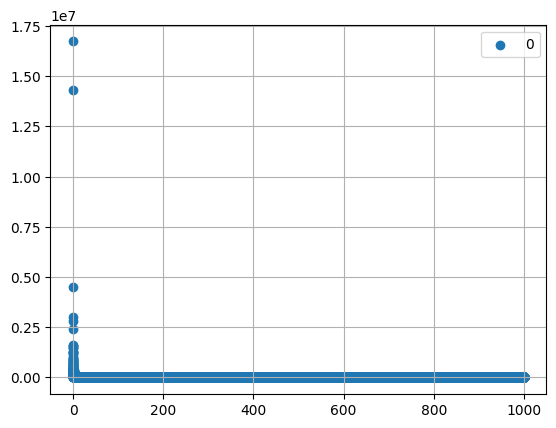

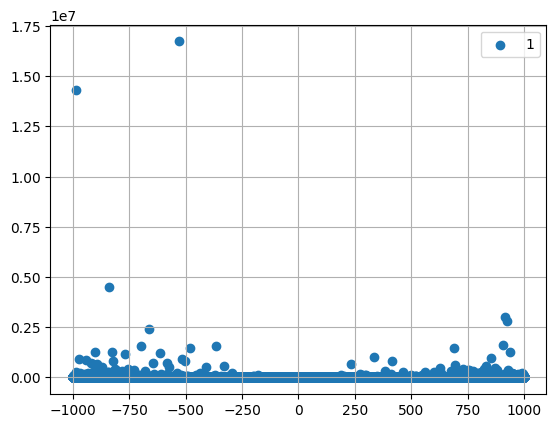

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in  range(2):


    fig, ax = plt.subplots()

    ax.scatter(X[:,i], y, label=i)
    # ax.scatter(test_scaled[:,4], y_test, label='ans')
    # plt.scatter(x, y, s=area2, marker='o', c=c)

    ax.legend()
    ax.grid(True)

    plt.show()